In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/PROJECT_3/show_attend_and_tell')

Mounted at /content/drive


In [2]:
with open("train.log") as f:
  data = f.read().splitlines()

In [3]:
len(data)

127910

In [4]:
data[:10]

['INFO: *************************************',
 'INFO: Epoch 0, 0 epochs since improvement',
 'INFO: Epoch: [0][0/1094]\tBatch Time 9.252 (9.252)\tData Load Time 7.210 (7.210)\tLoss 9.1920 (9.1920)\tTop-5 Accuracy 0.000 (0.000)',
 'INFO: Epoch: [0][1/1094]\tBatch Time 0.452 (4.852)\tData Load Time 0.001 (3.605)\tLoss 9.1219 (9.1555)\tTop-5 Accuracy 0.000 (0.000)',
 'INFO: Epoch: [0][2/1094]\tBatch Time 0.471 (3.392)\tData Load Time 0.001 (2.404)\tLoss 9.0818 (9.1300)\tTop-5 Accuracy 1.695 (0.585)',
 'INFO: Epoch: [0][3/1094]\tBatch Time 0.447 (2.655)\tData Load Time 0.001 (1.803)\tLoss 9.0630 (9.1132)\tTop-5 Accuracy 4.511 (1.567)',
 'INFO: Epoch: [0][4/1094]\tBatch Time 1.334 (2.391)\tData Load Time 0.873 (1.617)\tLoss 9.0127 (9.0923)\tTop-5 Accuracy 5.714 (2.432)',
 'INFO: Epoch: [0][5/1094]\tBatch Time 0.879 (2.139)\tData Load Time 0.418 (1.417)\tLoss 8.9935 (9.0757)\tTop-5 Accuracy 6.880 (3.179)',
 'INFO: Epoch: [0][6/1094]\tBatch Time 0.430 (1.895)\tData Load Time 0.001 (1.215)\t

In [ ]:
for i in data:
  if 'Epoch ' in i:
    print(data[data.index(i)-3])

In [6]:
loss = []
acc = []
batch = []

In [21]:
epoch = -1
loss = []
acc = []
for item in data:
  if 'Epoch ' in item:
    epoch += 1
  elif "Validation" not in item and "Batch" in item:
    loss.append(float(item.split("Loss")[1].split("(")[1].split(")")[0].strip()))
    acc.append(float(item.split("Accuracy")[1].split("(")[1].split(")")[0].strip()))

In [22]:
loss1 = [loss[ind] for ind in range(len(loss)) if (ind + 1) % 1094 == 0]
acc1 = [acc[ind] for ind in range(len(acc)) if (ind + 1) % 1094 == 0]

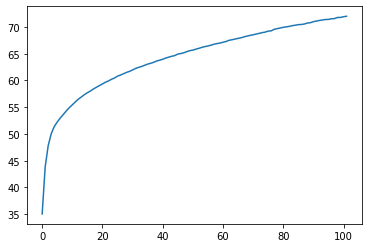

In [23]:
plt.plot(acc1)

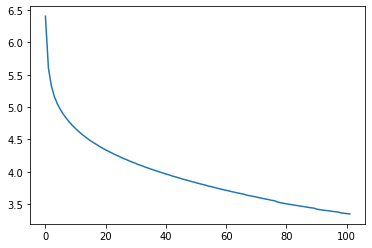

In [19]:
plt.plot(loss1)

In [7]:
epoch = -1
for item in data:
  if 'Epoch ' in item:
    epoch += 1
  elif 'Batch' not in item:
    _, batch_, rest = item.split(':')
    batch_ = batch_.split('/')[0][7:].strip()
    batch.append(int(batch_) + epoch*1094)
    loss_, acc_ = rest.split(",")
    loss.append(float(loss_.replace("loss", " ").strip()))
    acc.append(float(acc_.replace("top-5 accuracy", " ").strip()))

ValueError: ignored

In [ ]:
for x in data:
  if "VALIDATION" in x:
    print(x)

In [ ]:
loss_epoch = []
acc_epoch = []
for ind, loss_ in enumerate(loss):
  if batch[ind] % 1094 == 0:
    loss_epoch.append(loss_)
    acc_epoch.append(acc[ind])

In [ ]:
35008 / 1094

32.0

In [16]:
from matplotlib import pyplot as plt

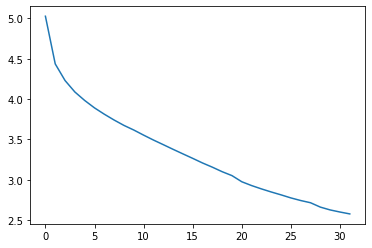

In [ ]:
plt.plot(list(range(32)), loss_epoch)

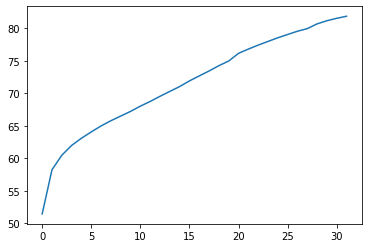

In [ ]:
plt.plot(list(range(32)), acc_epoch)

In [26]:
val_loss = []
val_acc = []
val_bleu = []
for item in data:
  if "VALIDATION" in item:
    loss_, acc_, bleu_ = item.split(",")
    val_loss.append(float(loss_[22:].strip()))
    val_acc.append(float(acc_[16:].strip()))
    val_bleu.append(float(bleu_[8:].strip()))

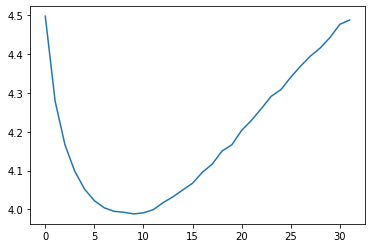

In [ ]:
plt.plot(list(range(32)), val_loss)

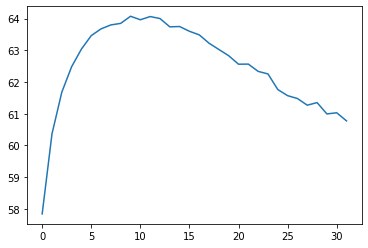

In [ ]:
plt.plot(list(range(32)), val_acc)

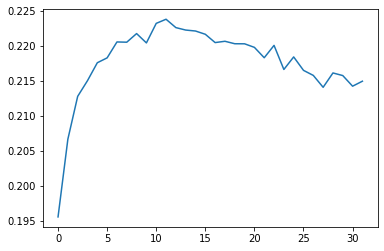

In [ ]:
plt.plot(list(range(32)), val_bleu)

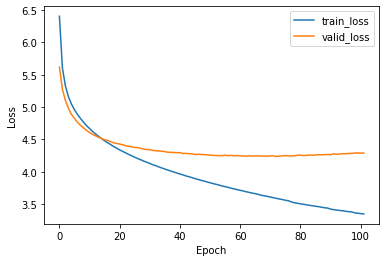

In [29]:
plt.plot(list(range(102)), loss1, label="train_loss")
# plt.plot(list(range(32)), acc_epoch)
plt.plot(list(range(102)), val_loss, label="valid_loss")
# plt.plot(list(range(32)), val_acc)
# plt.plot(list(range(32)), val_bleu)
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.savefig("loss_plot_show_attend_and_tell_v2.png")
plt.show()

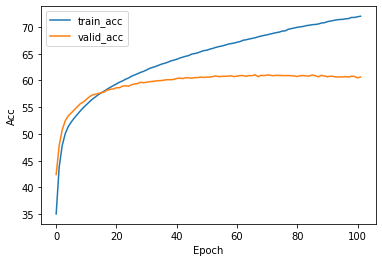

In [30]:
plt.plot(list(range(102)), acc1, label="train_acc")
plt.plot(list(range(102)), val_acc, label="valid_acc")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.savefig("acc_plot_show_attend_and_tell.v2.png")
plt.show()

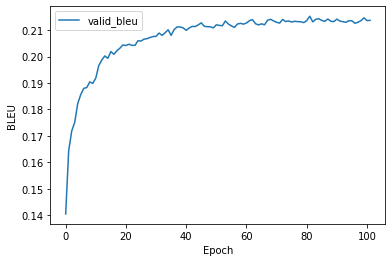

In [31]:
plt.plot(list(range(102)), val_bleu, label="valid_bleu")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("BLEU")
plt.savefig("bleu_show_attend_and_tell_v2.png")
plt.show()

In [27]:
len(acc1)

102

In [28]:
len(val_acc)

102